# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [1]:
# Importamos las librerias requeridas
import random
import numpy as np
import matplotlib.pyplot as plt

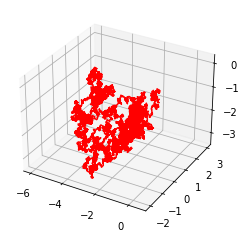

In [2]:
# Definimos la función caminata
def Caminata():
    # Definimos la trayectoria como un vector vacío
    T = [] #trayectoria
    # Definimos los 'pasos' como un vector vacío
    p = np.linspace(0,10,10000)
    # Los valores que podría tomar en el intervalo de tiempo
    xi = [-1, 1] 
    for i in p: 
        if len(T) != 0:
            T.append(T[-1]+0.001**(1*0.5)*random.choice(xi))
        else:
            T.append(0) #Se agregan las posiciones que va tomando
    return T

# Definimos los ejes para realizar la proyección
x=Caminata()
y=Caminata()
z=Caminata()

    
# Se la aletoriedad en una proyeccion en 3D (cada vez es diferente)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z,'r')

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [88]:
# Definimos una funcion con el volado en (-1,1)
def volado():
    return np.random.choice([1,-1]) 

In [89]:
#Definimos la función juego 
def juego():
    # Aquí le damos la vuelta a la moneda
    r=volado() 
    #  Se inicializa la variable
    gana=False 
    if r == 1:
        gana=True
    return gana

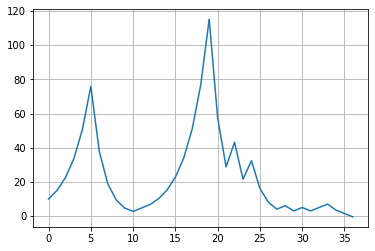

In [96]:
# Establecemos las condiciones del problema
ci=20
C=[]
def Apostador(c):
    ch=[]
    while c > 0:
        if juego():
            if c>6:
                c=c+(c/2)
            else:
                c+=2
        else:
            if c>6:
                c=c-(c/2)
            else:
                c-=2
        ch.append(c)
    return ch
plt.plot(Apostador(ci))
plt.grid()

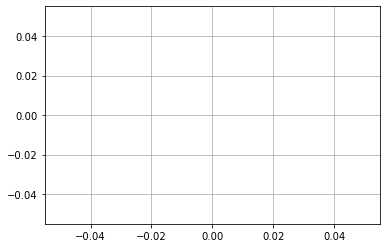

In [97]:
# Se grafica el histograma : 
plt.plot(C)
plt.grid()

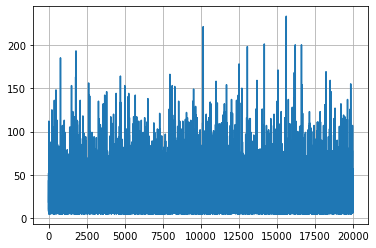

In [94]:
# Mediante simulación montecarlo ... 
#Se establece el número de apostadores
N=10**4 
for i in range(N):
    C.append(len(Apostador(ci)))
plt.plot(C)
plt.grid()

In [95]:
# Gráficamos 
N=10**4
for i in range(N):
    C.append(len(Apostador(ci)))
np.mean(C)

26.077833333333334